In [2]:
#to predict whether or not a passenger survived titanic crash
#will use logistic regression

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

dataset= pd.read_csv(r'D:\python ml data files\titanic_train.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

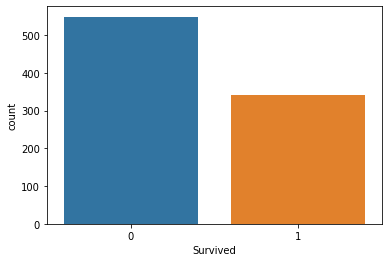

In [6]:
#1: Visualization of Data

#to better analyze the problem, see survivors v/s non surviors
sns.countplot(x='Survived', data= dataset)
#where 'Survived' is with with binary data 1
#clearly, we have greater non survivors than survivors

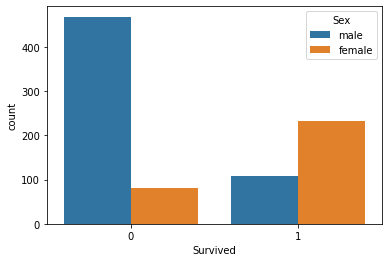

In [7]:
#we can also compare survival rates against other features
sns.countplot(x='Survived', hue='Sex', data= dataset)
#clearly female passengers were more likely survivors than male

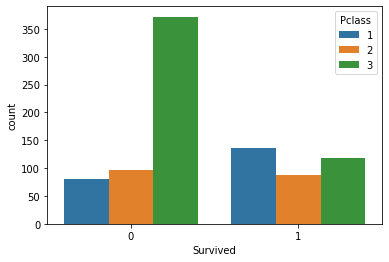

In [8]:
#similarly, using Pclass which is 1, 2, 3 in values according to where people's rooms were there on the ship
sns.countplot(x='Survived', hue='Pclass', data=dataset)
#clearly, people belonging to 3rd class i.e. cheapest were more likely to die

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

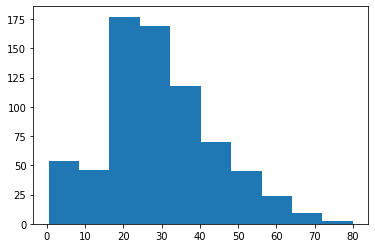

In [9]:
#we can also have age distribution using a histogram
plt.hist(dataset['Age'].dropna())
#dropna() is imp because dataset contains several null values in Age column as seen in describe()

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

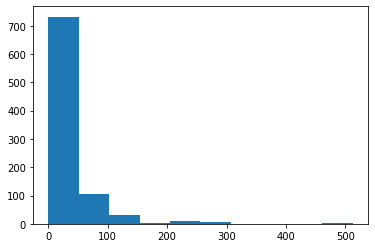

In [10]:
#we can also analyze the distribution of fare prices
plt.hist(dataset['Fare'])
#clearly there are 3 distinct groups of Fare prices within the dataset
#each corresponds the to different Pclass categories

In [11]:
###2 Missing Data identification

dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


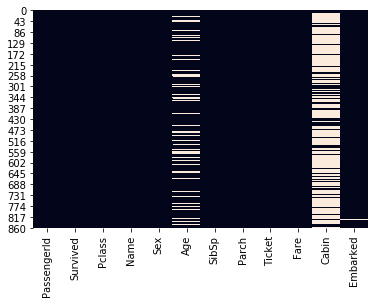

In [12]:
#since dataset is too large, it is not always possible to identify missing data this way
#therefore
#An even better way to check for missing data is by visulaization
sns.heatmap(dataset.isnull(), cbar=False)
#white lines all indicate the missing data

In [13]:
#using the heatmap, we conclude that:
#since, Age contains small missing data, we can fill it mathematically
#but since, Cabin contain huge missing data, we will Remove the column


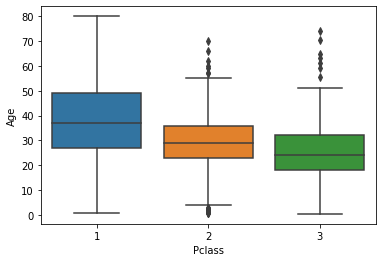

In [14]:
###3 Filling in Missing data


#filling in missing data with average data from the rest of the data set : imputation.
#for good imputation, we will fill in the missing Age values with avg age val from specific Pclass that passenger belongs to
#although, we could have simply averaged the entire age to use it, it would not give most accurate results


#to determin avg age of diffn Pclass:
sns.boxplot(dataset['Pclass'], dataset['Age'])   #boxplot(x axis, y axis)
#it clearly shows that people from Pclass 1 were of higher age than that of 2 or 3


In [15]:
#therefore we need to determine exact mean age for each Pclass

#Pclass value 1
dataset[dataset['Pclass'] == 1]['Age'].mean()


38.233440860215055

In [18]:
#Pclass value 2
dataset[dataset['Pclass'] == 2]['Age'].mean()

29.87763005780347

In [20]:
#Pclass 3
dataset[dataset['Pclass'] == 3]['Age'].mean()

25.14061971830986

In [21]:
#now we will create a fn to imputate our missing Age
def impute_missing_age(columns):

    age = columns[0]

    passenger_class = columns[1]

    

    if pd.isnull(age):

        if(passenger_class == 1):

            return dataset[dataset['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):

            return dataset[dataset['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return dataset[dataset['Pclass'] == 3]['Age'].mean()

        

    else:

        return age
    
#now we need to apply it to every row in dataset DataFrame
dataset['Age']= dataset[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)
print(dataset['Age'])





0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: Age, Length: 891, dtype: float64


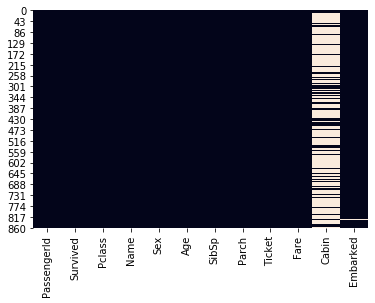

In [22]:
#now lets see the heat map again
sns.heatmap(dataset.isnull(), cbar=False)
#clearly, there is no missing value in age


In [23]:
###4 Building Logistic regression model

#removing the Cabin column
dataset.drop('Cabin', axis=1, inplace=True)

#now remove any additional columns that contain any missing data
dataset.dropna(inplace=True)

In [24]:
###5 we need to find a way to numerically work with observations that are not numerical i,e, categorical variables
sex_data= pd.get_dummies(dataset['Sex'], drop_first = True)
#from this we will only get one column
embarked_data= pd.get_dummies(dataset['Embarked'], drop_first = True)
#in embarked col, we have only removed one col.
#this has already removed multicollinearity since neither of the two columns are perfect predictors of each other


In [25]:
###6 Adding dummy variables to pandas DataFrame
dataset = pd.concat([dataset, sex_data, embarked_data], axis = 1)
print(dataset.columns)
#clearly columns male, Q, S are added

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')


In [26]:
###7 Removing unecessary columns
#Name, PassengerId and Ticket have no significance to our predictions
dataset.drop(['Name', 'Ticket', 'PassengerId', 'Sex', 'Embarked'], axis=1, inplace=True)
#print(dataset.columns)
dataset.head()
#clearly dataset has now have every field as numeric

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [27]:
###8 Creating Training data and Test data
y_data= dataset['Survived']   #test data
x_data= dataset.drop('Survived', axis=1)  #training data



In [28]:
###9 using train_test_split fn combined with list unpacking to generate training and test data

x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size=0.2)
#we have taken 20% of original data as test data


In [29]:
###10 Training the Logstic Regression model

#instantiating an instance of LogisticRegression object
model= LogisticRegression()

model.fit(x_train, y_train)


C:\Users\Ayush Agrawal\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
###Making predictions
predictions= model.predict(x_test)


In [31]:
#from sklearn.metrics import classification_report makes it easy to measure the performance of a classification machine learning model
classification_report(y_test, predictions)
print(confusion_matrix(y_test, predictions))


[[104  16]
 [ 13  45]]


In [32]:
#now, we compare the actual output values for x_test with predicted values
dataset1= pd.DataFrame({'Actual': y_test, 'Predicted': predictions})   
print(dataset1.head(25))



     Actual  Predicted
521       0          0
756       0          0
589       0          0
752       0          0
52        1          1
640       0          0
814       0          0
870       0          0
741       0          0
218       1          1
860       0          0
515       0          0
679       1          1
555       0          0
100       0          1
367       1          1
866       1          1
581       1          1
538       0          0
176       0          0
129       0          0
101       0          0
739       0          0
748       0          0
651       1          1


In [33]:
#predicting the entire dataset
predictions= model.predict(x_test)

#Determining the accuracy of the model
score= model.score(x_test, y_test)
print(score)

#model is fairly accurate

0.8370786516853933


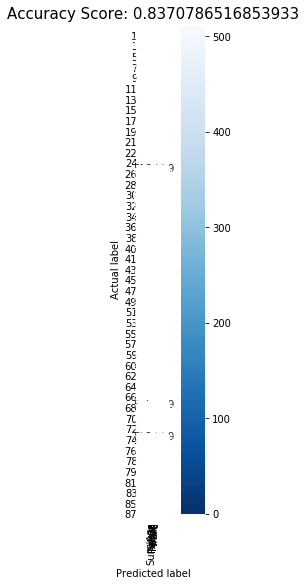

In [35]:
plt.figure(figsize=(9,9))
sns.heatmap(dataset, annot=True, fmt=".3f", linewidth=.5, square= True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title= 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size= 15)
plt.show()

